In [1]:
import subprocess as sub

In [2]:
filename = "2112.10752.pdf"
import subprocess as sub
dpi = 150
sub.run(f"pdftoppm -png -rx {dpi} -ry {dpi} pdfs/{filename} pdfs/converted", shell=True, capture_output=True)

CompletedProcess(args='pdftoppm -png -rx 50 -ry 50 pdfs/2112.10752.pdf pdfs/converted', returncode=0, stdout=b'', stderr=b'')

In [13]:
# import glob
# import time
# import subprocess as sub
# from tqdm import tqdm

# pdfs = glob.glob('pdfs/2302/*')
# dpi = 150

# for i, pdf in enumerate(tqdm(pdfs)):
#     # time.sleep(1)
#     sub.run(f"pdftoppm -png -rx {dpi} -ry {dpi} {pdf} pdfs/images/{i}", shell=True, capture_output=True)

In [27]:
import glob
imgs = glob.glob('pdfs/bigmages/*')
print(len(imgs))

218721


In [25]:
oldmgs = glob.glob('pdfs/images/*')
print(len(oldmgs))

21497


In [ ]:
sub.run(f"pdfimages -png -p pdfs/{filename} pdfs/extracted", shell=True, capture_output=True)

In [14]:
!pwd
lat = "something.tex"
print(sub.run(f"/home/jaded79/texlive/bin/x86_64-linux/pdflatex {lat}", shell=True, capture_output=True, cwd="/home/jaded79/visual-check/pdfs/").stdout.decode("utf-8"))

/home/jaded79/visual-check
This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./something.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/home/jaded79/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/home/jaded79/texlive/texmf-dist/tex/latex/base/size10.clo)) (./PRIMEarxiv.sty
 (/home/jaded79/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/home/jaded79/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/home/jaded79/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/home/jaded79/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/home/jaded79/texlive/texmf-dist/tex/latex/fancyhdr/fancyhdr.sty))
(/home/jaded79/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/home/jaded79/texlive/texmf-dist/tex/latex/base/fontenc.sty
(/home/jaded79/texlive/texmf-dist/tex/latex/psnfss/t1ptm.fd)
! Font T1/ptm/m/n


\documentclass{article}
\begin{document}
Hello, world!
\end{document}

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(/tmp/tmpuw5k8cr1/temp.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/home/jaded79/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/home/jaded79/texlive/texmf-dist/tex/latex/base/size10.clo))
(/home/jaded79/texlive/texmf-dist/tex/latex/l3backend/l3backend-pdftex.def)
No file temp.aux.
[1{/home/jaded79/texlive/texmf-var/fonts/map/pdftex/updmap/pdftex.map}]
(/tmp/tmpuw5k8cr1/temp.aux) )</home/jaded79/texlive/texmf-dist/fonts/type1/publ
ic/amsfonts/cm/cmr10.pfb>
Output written on /tmp/tmpuw5k8cr1/temp.pdf (1 page, 12875 bytes).
Transcript written on /tmp/tmpuw5k8cr1/temp.log.


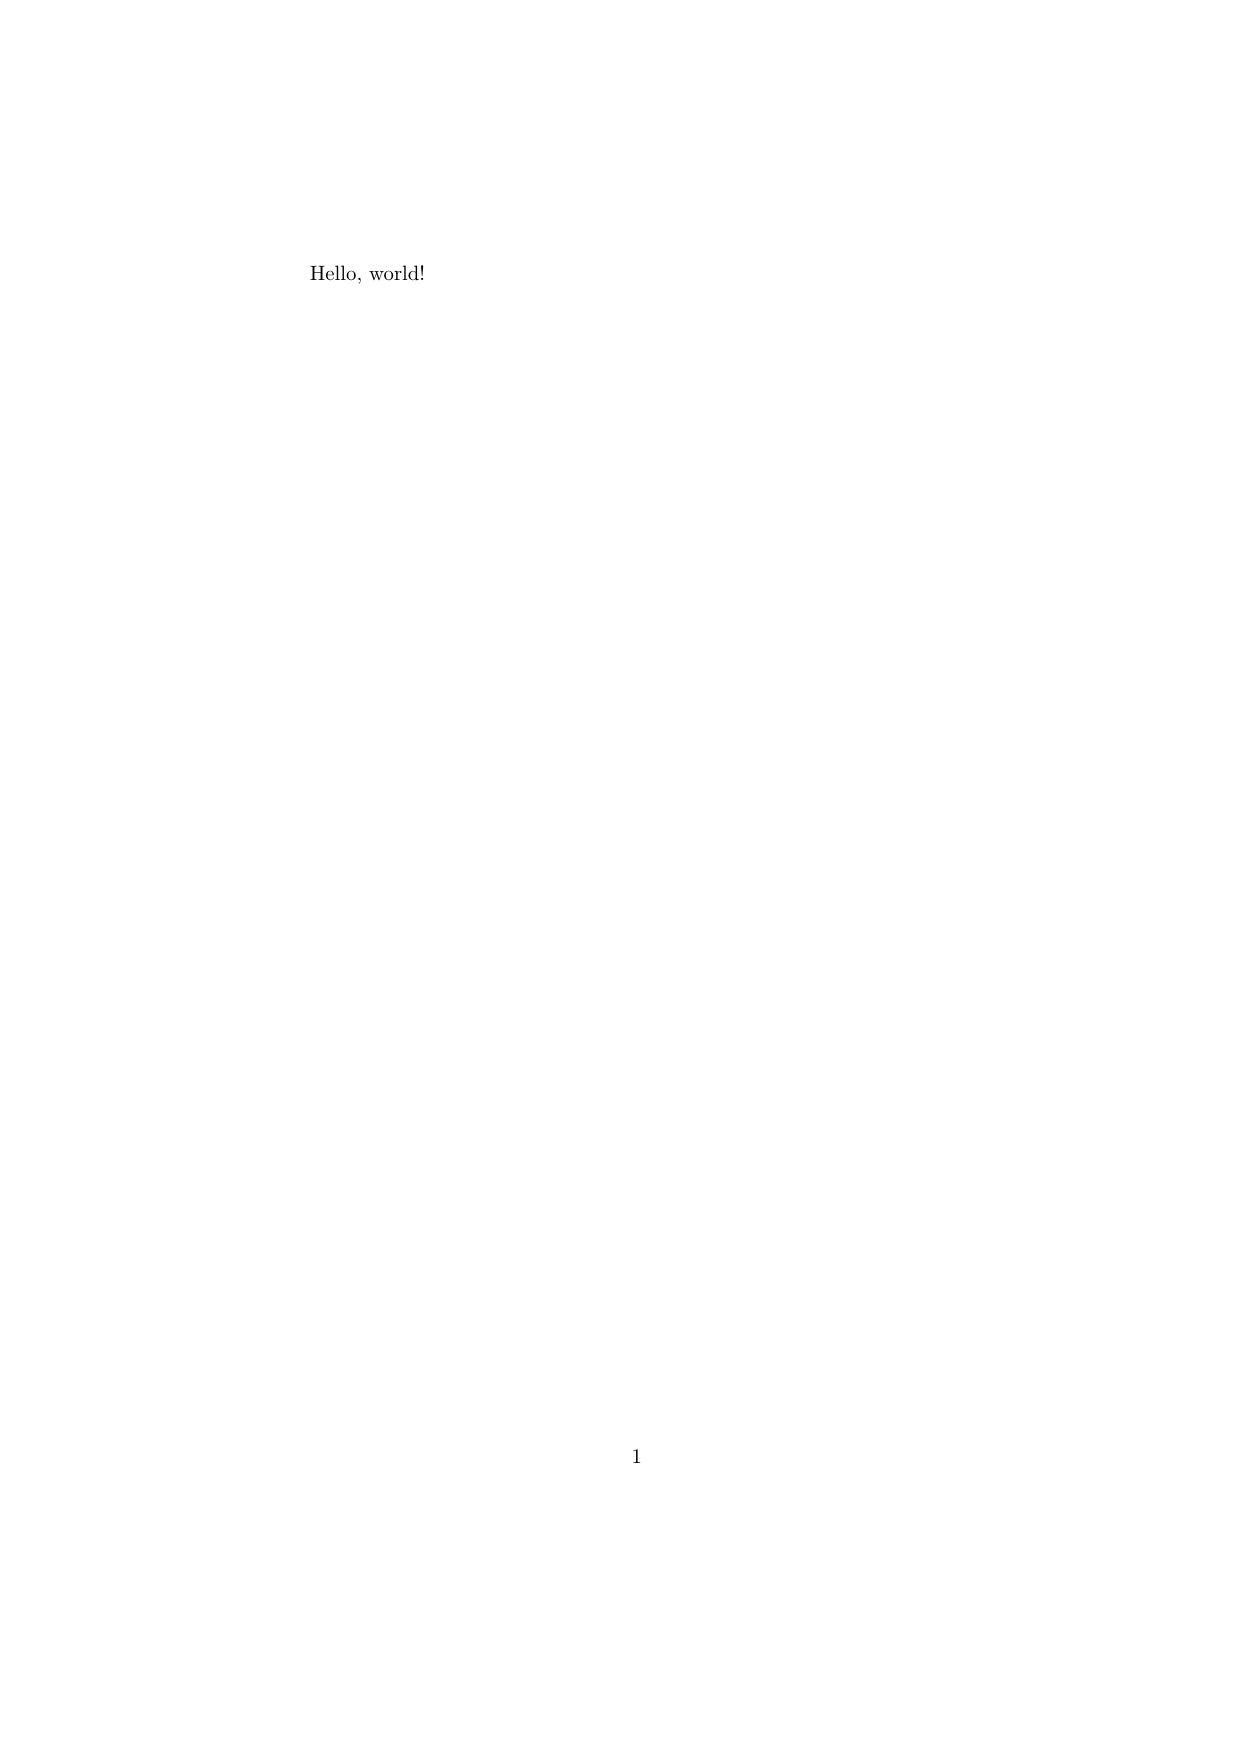

In [53]:
from PIL import Image
import io
import subprocess as sub

# convert latex to image in memory
def latex_to_image(latex_str: str, dpi: int = 150) -> Image.Image:
    # Compile the LaTeX code into a PDF using pdflatex
    print(type(latex_str))
    encoded_str = latex_str
    latex_process = sub.run(
        ["/home/jaded79/texlive/bin/x86_64-linux/pdflatex", "-halt-on-error", "-jobname", "temp", "-output-format", "pdf", "-"],
        input=encoded_str,
        stdout=sub.PIPE,
        # stderr=sub.PIPE,
        check=True,
        # capture_output=True,
        text=True,
        shell=True
    )


    if latex_process.returncode != 0:
        raise RuntimeError(f"pdflatex failed: {latex_process.stderr}")

    print("latex_process")
    print(latex_process.stdout)
    # Read the generated PDF into a BytesIO object
    print("latex_process.stdout.encode()")
    pdf_data = io.BytesIO(latex_process.stdout.encode())
    print("pdf_data")
    print(pdf_data.getvalue())
    print('done with that')
    # Run pdftoppm on the PDF data to generate the image
    pdftoppm_process = sub.run(
        ["/bin/pdftoppm", "-png", "-rx", "150", "-ry", "150", "-", "-"],
        input=pdf_data.getvalue(),
        capture_output=True,
        # check=True,
    )

    print(pdftoppm_process.stderr.decode())

    if pdftoppm_process.returncode != 0:
        raise RuntimeError(f"pdftoppm failed: {pdftoppm_process.stderr}")

    # Read the generated image into a BytesIO object
    image_data = io.BytesIO(pdftoppm_process.stdout)

    # Open the image using PIL
    image = Image.open(image_data)

    return image

import tempfile
import os
from pdf2image import convert_from_bytes, convert_from_path


def latex_to_image_tempfile(latex_str: str) -> Image.Image:
    # Create a temporary directory
    with tempfile.TemporaryDirectory() as tmpdir:
        # Save the LaTeX string to a temporary .tex file
        tex_path = os.path.join(tmpdir, "temp.tex")
        with open(tex_path, "w") as tex_file:
            tex_file.write(latex_str)

        # Run pdflatex on the .tex file to generate the PDF
        pdf_path = os.path.join(tmpdir, "temp.pdf")
        sub.run(["/home/jaded79/texlive/bin/x86_64-linux/pdflatex", "-output-directory", tmpdir, tex_path], check=True)

        # Convert the PDF to an image using pdf2image
        images = convert_from_path(pdf_path, dpi=150, fmt="png")

        return images[0]

latex_str = r"""
\documentclass{article}
\begin{document}
Hello, world!
\end{document}
"""
print(latex_str)
image = latex_to_image_tempfile(latex_str)
# image.show()
# image.save("test.png")
image

In [61]:
from truereader import TrueReader
from dataclasses import dataclass, field

model = TrueReader.from_pretrained(
    "/home/jaded79/visual-check/llama_weights/",
    # cache_dir=field(default=None),
)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

: 

: 